# Imports

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from ucimlrepo import fetch_ucirepo

# Fetching dataset

In [2]:
glass_identification = fetch_ucirepo(id=42)
dataset = glass_identification.data.original
x = glass_identification.data.features
y = glass_identification.data.targets

In [4]:
class_dict = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: "vehicle_windows_float_processed",
    4: "vehicle_windows_non_float_processed",
    5: "containers",
    6: "tableware",
    7: "headlamps"
}

# Data exploration

In [7]:
dataset.shape

(214, 11)

In [8]:
dataset.head(20)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [13]:
dataset.drop(columns=['Id_number'], inplace=True)

In [14]:
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
dataset.groupby('Type_of_glass').size()

Type_of_glass
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

C:\Users\matig\AppData\Local\Temp\ipykernel_24692\1062197002.py:2: UserWarning: When passing multiple axes, layout keyword is ignored.
  dataset.plot(kind='box', subplots=True, layout=(2, 5), sharex=False, sharey=False, ax=axes)


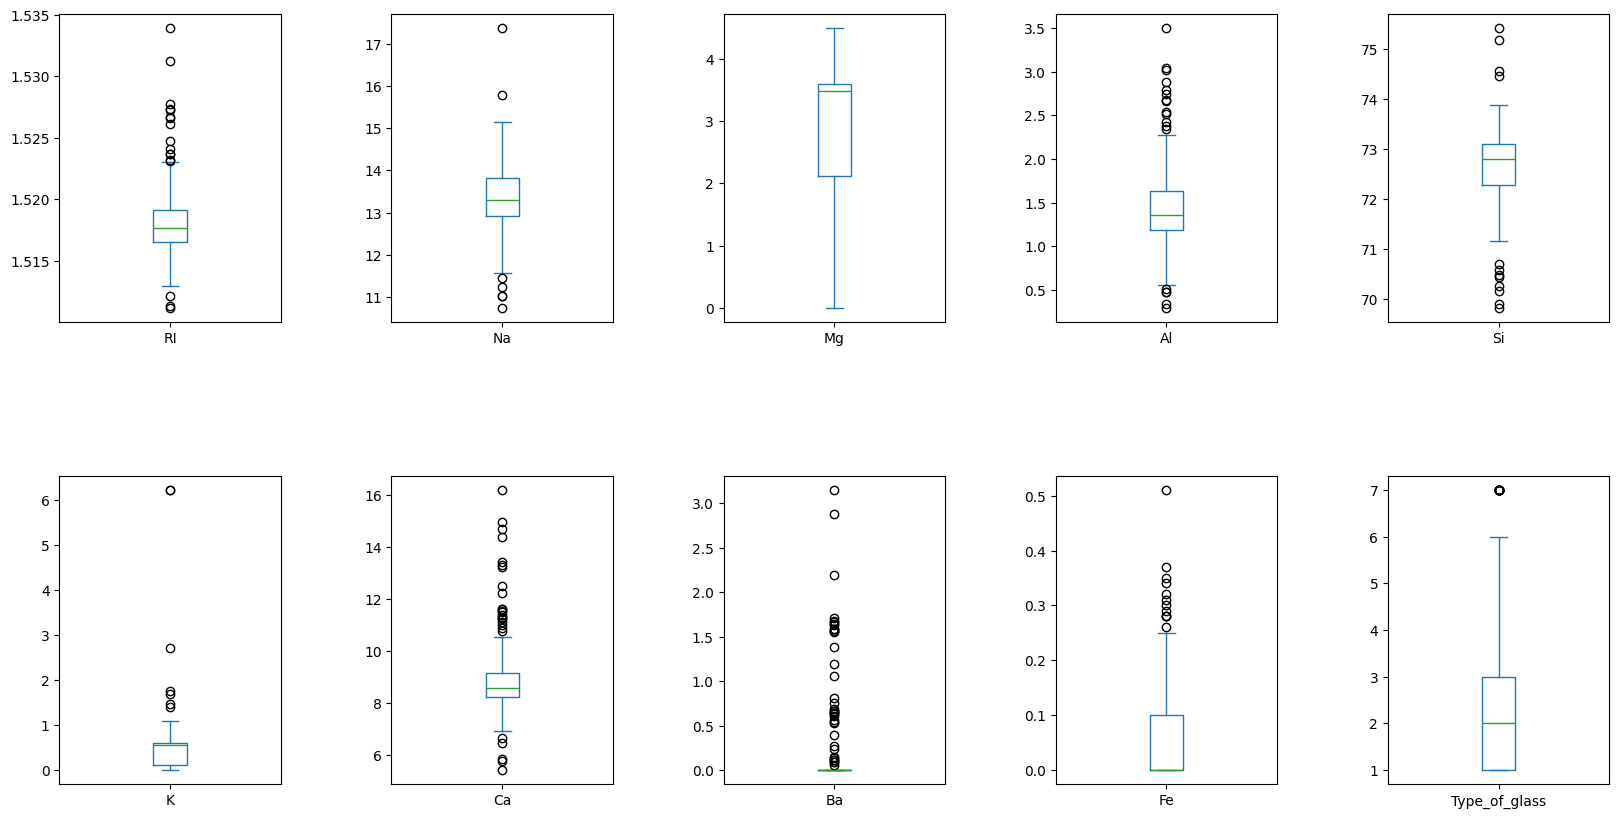

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust figsize to make subplots larger
dataset.plot(kind='box', subplots=True, layout=(2, 5), sharex=False, sharey=False, ax=axes)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()

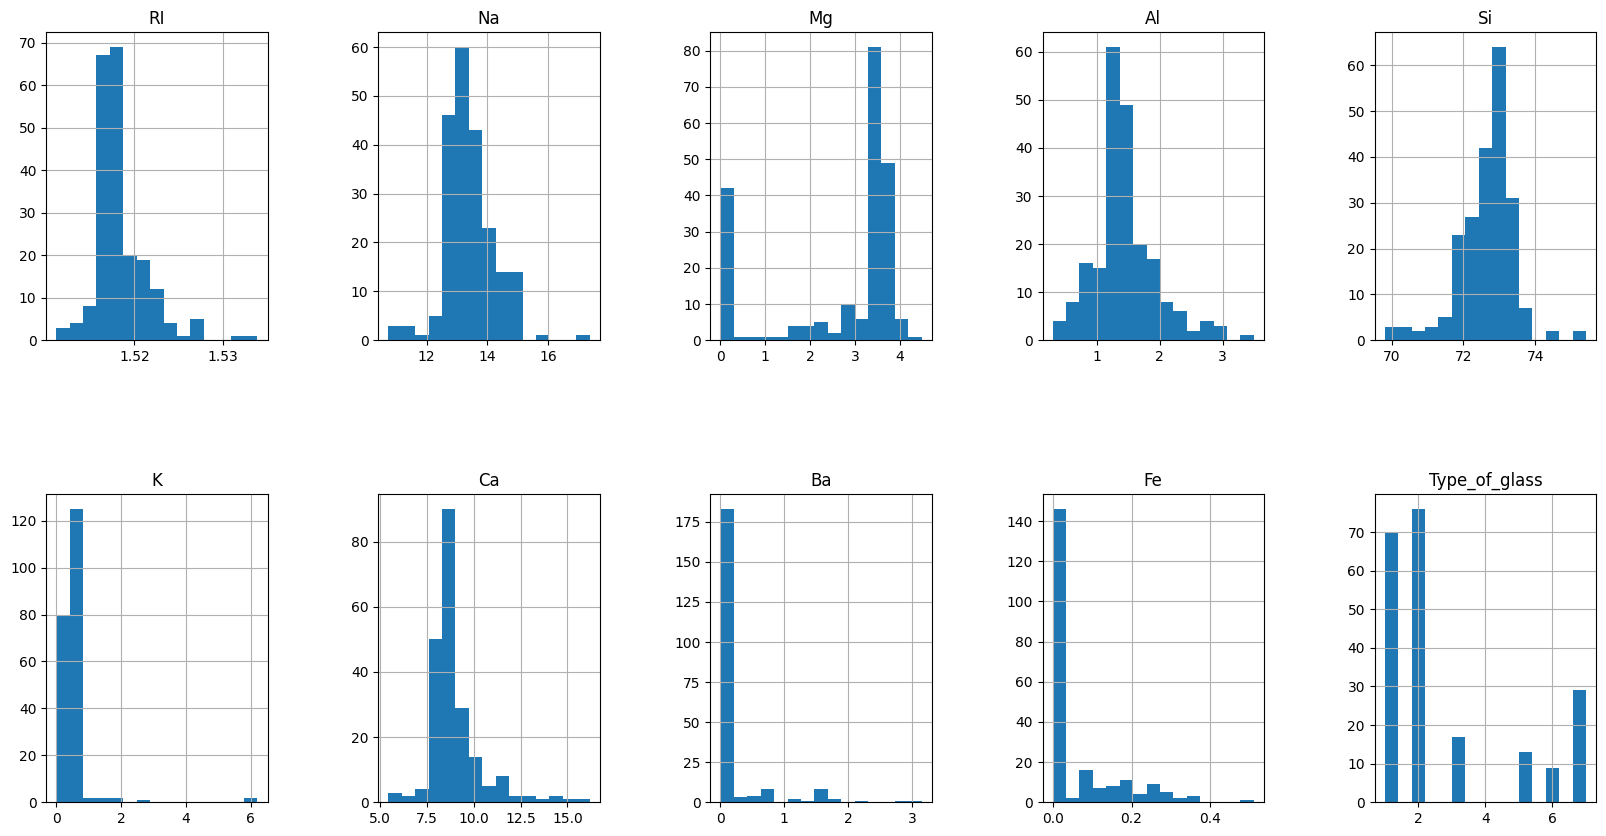

In [22]:
# Create the histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust figsize to make subplots larger
dataset.hist(ax=axes, bins=15)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()


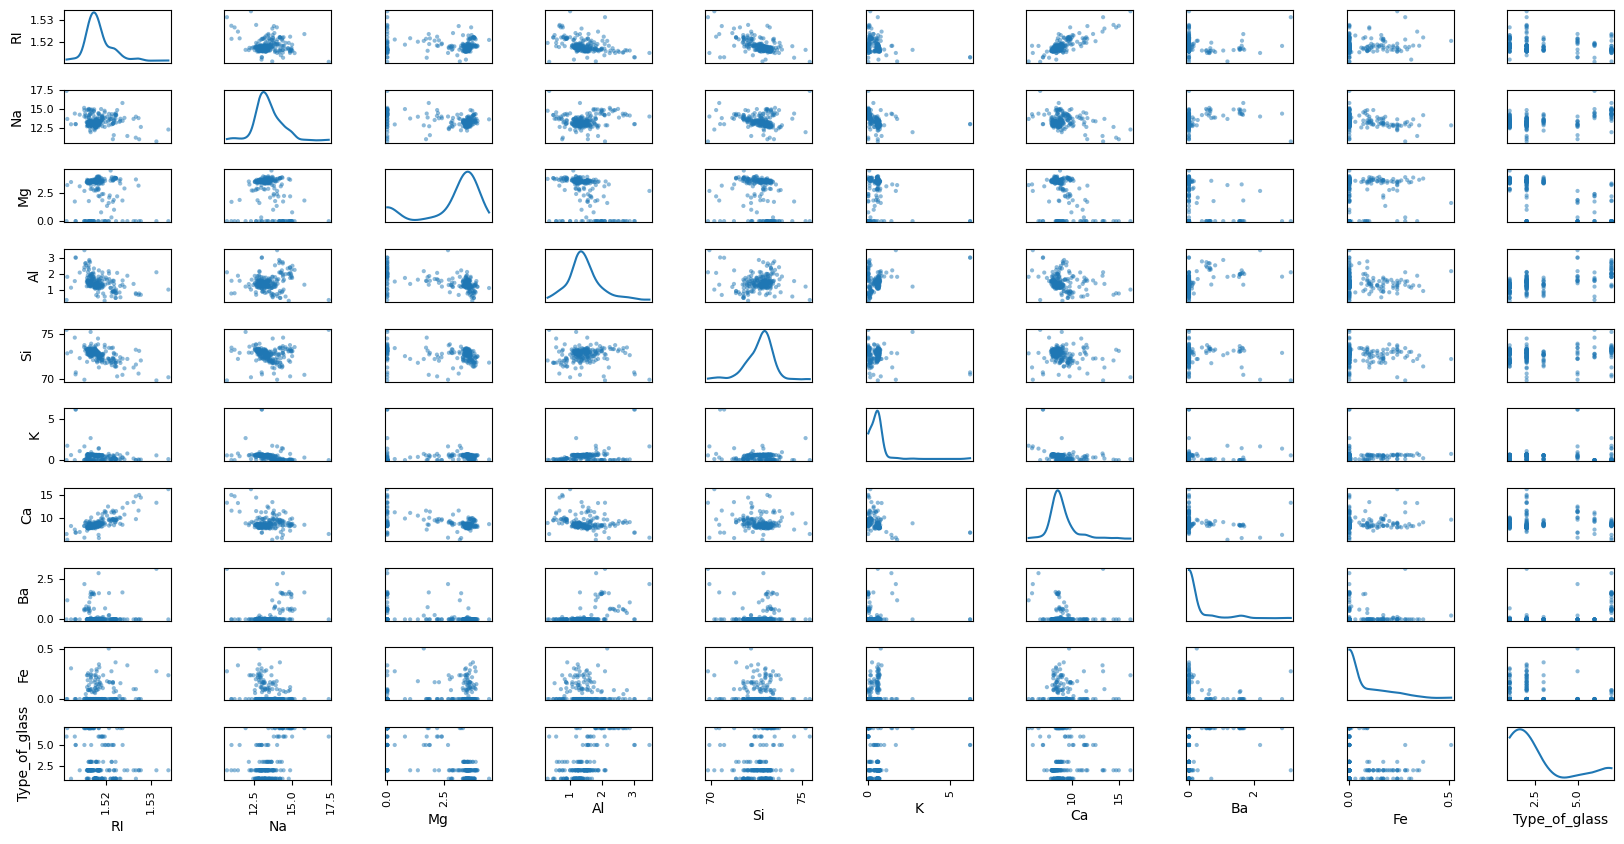

In [26]:
# Create the scatter plot matrix
scatter_matrix_fig = scatter_matrix(dataset, figsize=(20, 10), diagonal='kde')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()